In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import metrics

In [2]:
DATA = "../data"

In [59]:
df1 = pd.read_csv(os.path.join(DATA, "competition_synthesis.csv"))
df2 = pd.read_csv(os.path.join(DATA, "competition_test.csv"))
df3 = pd.read_csv(os.path.join(DATA, "evt_synthesis.csv"))
test = pd.concat([df1, df2, df3])
test.reset_index(inplace=True, drop=True)

In [60]:
bin_activity = []

for i in test["activity"].tolist():
    if i <= 2.5:
        bin_activity.append(1)
    else:
        bin_activity.append(0)

test["bin_activity"] = bin_activity

In [61]:
df1 = pd.read_csv(os.path.join(DATA, "zairachem_outputs", "output_competition_synthesis.csv"))
df2 = pd.read_csv(os.path.join(DATA, "zairachem_outputs", "output_competition_test.csv"))
df3 = pd.read_csv(os.path.join(DATA, "zairachem_outputs", "output_evt_synthesis.csv"))
out = pd.concat([df1, df2, df3])
out.reset_index(inplace=True, drop=True)
out.rename(columns={"compound_id":"osm"}, inplace=True)

In [62]:
val = pd.merge(test, out, on = ["osm", "smiles"])

In [64]:
val.columns

Index(['osm', 'smiles', 'activity', 'bin_activity', 'reg_qnt', 'clf_ex1',
       'clf_ex1_bin', 'reg_raw'],
      dtype='object')

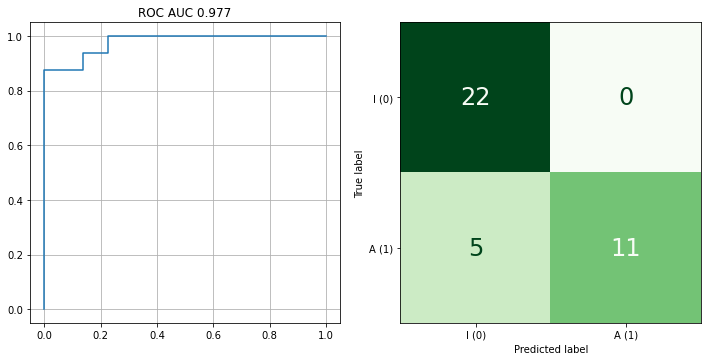

In [69]:
bt =  val["bin_activity"].tolist() #binary true
bp = val["clf_ex1_bin"].tolist() #binary predicted
proba = val["clf_ex1"].tolist() #predicted y proba

def roc_plot(ax, bt, yp):
    fpr, tpr, _ = metrics.roc_curve(bt, yp)
    ax.plot(fpr, tpr)
    ax.grid()
    ax.set_title("ROC AUC {0}".format(round(metrics.auc(fpr, tpr), 3)))
def confusion_plot(ax, bt, bp):
    class_names = ['I (0)', 'A (1)']
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(bt, bp), display_labels = class_names)
    disp.plot(ax=ax, cmap=plt.cm.Greens, colorbar=False,)
    for labels in disp.text_.ravel():
        labels.set_fontsize(24)
    ax.grid(False)
    return ax


fig, axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.flatten()
ax = axs[0]
roc_plot(ax, bt, proba)
ax = axs[1]
confusion_plot(ax, bt, bp)
plt.tight_layout()

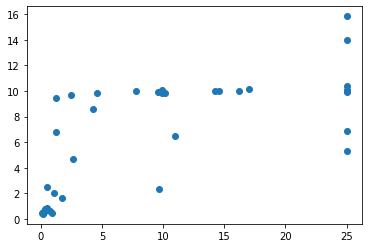

In [70]:
yt = val["activity"]
yp = val["reg_raw"]

plt.scatter(yt, yp)

In [4]:
# Take most real active molecules and best generated for a round of molmap
osm = pd.read_csv(os.path.join(DATA, "training_all.csv"))
eos = pd.read_csv(os.path.join(DATA, "eosi_s4_candidates_90.csv"))

In [10]:
osm.sort_values("activity", ascending=True, inplace =True)
osm_sel = osm.head(90)

In [14]:
osm_sel.rename(columns={"osm":"id"}, inplace=True)
eos.rename(columns={"EosId":"id"}, inplace=True)
eos.drop(columns="InchiKey", inplace=True)
osm_sel.drop(columns="activity", inplace=True)

C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Gemma\Anaconda3\envs\malariaOSM\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
actives = pd.concat([osm_sel, eos], ignore_index=True)
actives.to_csv(os.path.join(DATA, "high_actives.csv"), index=False)